In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

df=pd.read_csv(r"C:\Users\kavin\OneDrive\Desktop\Random forest\df_features.csv")
df


,word_freq_free,word_freq_win,word_freq_offer,sms_length,is_spam
0,0,0,0,111,0
1,0,0,0,29,0
2,1,1,0,155,1
3,0,0,0,49,0
4,0,0,0,61,0
...,...,...,...,...,...
5567,0,0,0,161,1
5568,0,0,0,37,0
5569,0,0,0,57,0
5570,1,0,0,125,0


In [10]:
df.isnull().sum()

word_freq_free     0
word_freq_win      0
word_freq_offer    0
sms_length         0
is_spam            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(4933)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='is_spam', ylabel='Count'>

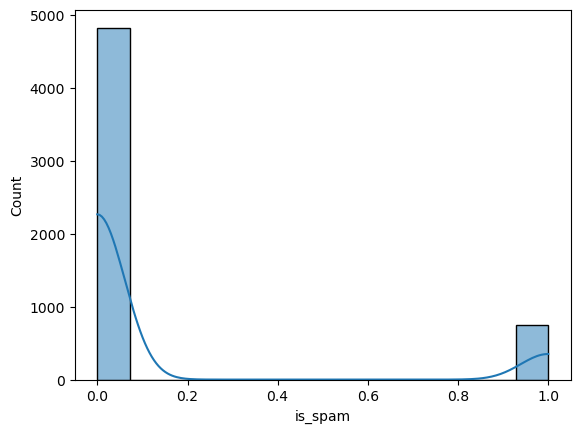

In [21]:
sns.histplot(df['is_spam'],kde=True)

<Axes: >

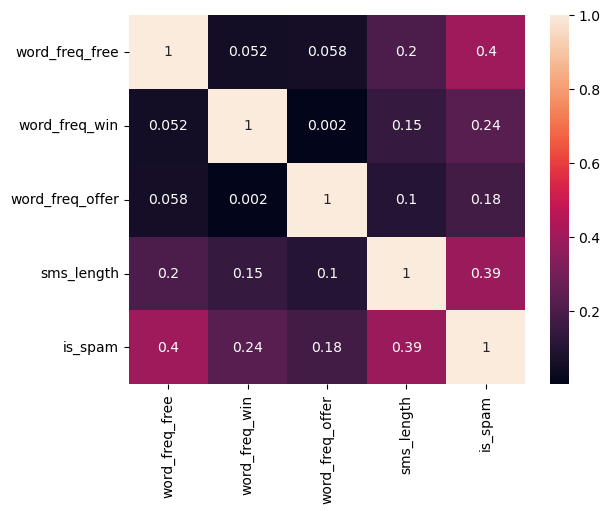

In [22]:
sns.heatmap(df.corr(),annot=True)

In [24]:
X = df[['word_freq_free', 'word_freq_win', 'word_freq_offer', 'sms_length']]
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

new_sms = [[0.9,0.1,0.8,120]]
prediction = nb.predict(new_sms)
print("Predicted Class (0=Not Spam, 1=Spam):", prediction[0])

Test Accuracy: 0.8851399856424982
Predicted Class (0=Not Spam, 1=Spam): 1


c:\Users\kavin\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8851399856424982
Precision: 0.628099173553719
Recall: 0.39790575916230364
F1 Score: 0.48717948717948717
Confusion Matrix:
 [[1157   45]
 [ 115   76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1202
           1       0.63      0.40      0.49       191

    accuracy                           0.89      1393
   macro avg       0.77      0.68      0.71      1393
weighted avg       0.87      0.89      0.87      1393



In [29]:
import pickle

with open("destree_model.sav", "wb") as f:
    pickle.dump(nb, f)

with open("destree_model.sav", "rb") as f:
    loaded_model = pickle.load(f)